# Website Traffic Analysis

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [2]:
website_traffic=pd.read_csv("traffic.csv")
website_traffic

,event,date,country,city,artist,album,track,isrc,linkid
0,click,8/21/2021,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,8/21/2021,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,8/21/2021,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,8/21/2021,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,8/21/2021,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
...,...,...,...,...,...,...,...,...,...
226273,pageview,8/24/2021,Kuwait,Kuwait City,Sean Paul,The Trinity,Temperature,USAT20505520,04ba6b17-1055-4f0e-a75e-3cdb0d0d4106
226274,pageview,8/24/2021,India,Chennai,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c
226275,pageview,8/24/2021,India,Jaipur,"Trippie Redd, Lil Uzi Vert",Holy Smokes (feat. Lil Uzi Vert),Holy Smokes,QZJ842001118,eedc8702-6bd2-499a-972f-260c35f72e0f
226276,pageview,8/24/2021,France,Unknown,Young Thug,Tick Tock,Tick Tock,USAT22104514,e0a76dc3-7ccd-405f-8ee8-a2c55c0e0ed2


### Information About Dataset

In [3]:
website_traffic.shape

(226278, 9)

In [4]:
website_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


# Data Cleaning
 Task to do

* Handle missing values
* Remove duplicates
* Format the data

In [5]:
website_traffic.isnull().sum()

event         0
date          0
country      11
city         11
artist       37
album         5
track         5
isrc       7121
linkid        0
dtype: int64

In [6]:
website_traffic.dropna(inplace=True)

In [7]:
website_traffic.isnull().sum()

event      0
date       0
country    0
city       0
artist     0
album      0
track      0
isrc       0
linkid     0
dtype: int64

In [8]:
website_traffic.drop_duplicates()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,8/21/2021,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,8/21/2021,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,8/21/2021,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,8/21/2021,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
5,click,8/21/2021,United States,Los Angeles,KenTheMan,I'm Perfect,I'm Perfect,US39N2102090,190c7170-4044-4c97-9709-926917155b02
...,...,...,...,...,...,...,...,...,...
226263,pageview,8/24/2021,Turks and Caicos Islands,Providenciales,"Kayla Nicole, Taylor Girlz, Flo Milli","Bundles 2 (feat. Flo Milli, Taylor Girlz)","Bundles 2 (feat. Flo Milli, Taylor Girlz)",QMCE32100359,fbf4b935-f961-4b13-b1d8-45ad47093559
226264,pageview,8/24/2021,Australia,Sydney,salem ilese,Mad at Disney,Mad at Disney,QMEZE2076989,61923241-cf99-4fe2-b9ec-6cf356565842
226269,pageview,8/24/2021,United Kingdom,London,Zeina,Talk Luv,Talk Luv,QZAKB2124527,4c402853-c65b-4ea5-ac65-04a9faf5c043
226272,pageview,8/24/2021,United States,Chicago,"Pop Smoke, 21 Savage, 42 Dugg",Faith,Bout A Million (feat. 42 Dugg & 21 Savage),USUM72112386,9ca8ca2d-3507-4287-8f66-a80314dc7169


In [9]:
Date_Format=pd.to_datetime(website_traffic['date'])

In [10]:
website_traffic['date']=Date_Format

In [11]:
website_traffic.dtypes

event              object
date       datetime64[ns]
country            object
city               object
artist             object
album              object
track              object
isrc               object
linkid             object
dtype: object

In [12]:
website_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219149 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   event    219149 non-null  object        
 1   date     219149 non-null  datetime64[ns]
 2   country  219149 non-null  object        
 3   city     219149 non-null  object        
 4   artist   219149 non-null  object        
 5   album    219149 non-null  object        
 6   track    219149 non-null  object        
 7   isrc     219149 non-null  object        
 8   linkid   219149 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 16.7+ MB


# Exploratory Data Analysis 

# Traffic Trends Analysis


In [13]:
website_traffic.set_index('date')

,event,country,city,artist,album,track,isrc,linkid
date,,,,,,,,
2021-08-21,click,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2021-08-21,click,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2021-08-21,click,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
2021-08-21,click,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
2021-08-21,click,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
...,...,...,...,...,...,...,...,...
2021-08-24,pageview,Kuwait,Kuwait City,Sean Paul,The Trinity,Temperature,USAT20505520,04ba6b17-1055-4f0e-a75e-3cdb0d0d4106
2021-08-24,pageview,India,Chennai,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c
2021-08-24,pageview,India,Jaipur,"Trippie Redd, Lil Uzi Vert",Holy Smokes (feat. Lil Uzi Vert),Holy Smokes,QZJ842001118,eedc8702-6bd2-499a-972f-260c35f72e0f


### Daily Traffic Trends:

In [14]:
daily_traffic=website_traffic['date'].value_counts()
daily_traffic

date
2021-08-21    34079
2021-08-22    32629
2021-08-20    32308
2021-08-25    30442
2021-08-19    30068
2021-08-24    29821
2021-08-23    29802
Name: count, dtype: int64

# User Behavior Analysis

### Event Type Distribution

In [15]:
users=website_traffic['event'].value_counts()
users

event
pageview    137115
click        53504
preview      28530
Name: count, dtype: int64

### Top 10 Artists by User Interaction

In [16]:
artist_interactions =website_traffic['artist'].value_counts().head(10)
artist_interactions

artist
Tesher                                                          40841
Anne-Marie                                                      10649
Tundra Beats                                                     9750
Surf Mesa, Emilee                                                7524
DMNDS, Strange Fruits Music, Fallen Roses, Lujavo, Nito-Onna     5512
Reyanna Maria                                                    5434
Shawn Mendes, Tainy                                              5409
50 Cent, Olivia                                                  5367
Roddy Ricch                                                      5085
Olivia Rodrigo                                                   4103
Name: count, dtype: int64

# Conversion Rate Analysis

In [17]:
total_events = len(website_traffic)
clicks = len(website_traffic[website_traffic['event'] == 'click'])
conversion_clicks_rate = (clicks / total_events) * 100

pageview= len(website_traffic[website_traffic['event'] == 'pageview'])
conversion_pageview_rate = (pageview / total_events) * 100

preview= len(website_traffic[website_traffic['event'] == 'preview'])
conversion_preview_rate = (preview / total_events) * 100

print(f"Conversion Rate For Clicks: {conversion_clicks_rate:.2f}%")
print(f"Conversion Rate For Pageview: {conversion_pageview_rate:.2f}%")
print(f"Conversion Rate For Preview: {conversion_preview_rate:.2f}%")

Conversion Rate For Clicks: 24.41%
Conversion Rate For Pageview: 62.57%
Conversion Rate For Preview: 13.02%


#  Identify Most Popular Pages

### Top 10 Most Popular Pages

In [18]:
top_pages = website_traffic['linkid'].value_counts().head(10)
top_pages

linkid
2d896d31-97b6-4869-967b-1c5fb9cd4bb8    40841
522da5cc-8177-4140-97a7-a84fdb4caf1c    10314
e849515b-929d-44c8-a505-e7622f1827e9     9750
c2c876ab-b093-4750-9449-6b4913da6af3     6733
681d888a-59ce-4acb-b7c5-95dab0c063d9     5512
23199824-9cf5-4b98-942a-34965c3b0cc2     5434
97105aff-3e40-4c2e-bfeb-563b55e8f5dd     5367
d5317591-872a-487d-87cb-10a516643d5f     5352
a82e72d8-523f-43ab-9fd0-992605d54b4e     5036
a107c329-5d35-4c7d-8050-50bc69ce7dbc     3879
Name: count, dtype: int64

# Traffic Sources 

In [19]:
top_countries=website_traffic['country'].value_counts()
top_countries.head(25)

country
Saudi Arabia            46960
India                   42991
United States           27355
France                  15638
Iraq                     8168
United Kingdom           5964
Pakistan                 5585
Germany                  4760
United Arab Emirates     3696
Turkey                   3494
Kuwait                   3015
Oman                     2797
Canada                   2736
Australia                2202
Nigeria                  2161
Netherlands              1785
Norway                   1494
Bangladesh               1432
Sweden                   1363
Belgium                  1304
Jordan                   1124
Ghana                    1038
Morocco                   982
Mexico                    973
Poland                    972
Name: count, dtype: int64

#  User Pathways

In [20]:
website_traffic_sorted = website_traffic.sort_values(by=['date', 'linkid'])
user_pathways = website_traffic_sorted.groupby(website_traffic_sorted['date'].dt.date)['linkid'].apply(list)
print(user_pathways.head(10)) 


date
2021-08-19    [006af6a0-1f0d-4b0c-93bf-756af9071c06, 006af6a...
2021-08-20    [006af6a0-1f0d-4b0c-93bf-756af9071c06, 006af6a...
2021-08-21    [006af6a0-1f0d-4b0c-93bf-756af9071c06, 006af6a...
2021-08-22    [006af6a0-1f0d-4b0c-93bf-756af9071c06, 006af6a...
2021-08-23    [006af6a0-1f0d-4b0c-93bf-756af9071c06, 006af6a...
2021-08-24    [006af6a0-1f0d-4b0c-93bf-756af9071c06, 006af6a...
2021-08-25    [006af6a0-1f0d-4b0c-93bf-756af9071c06, 006af6a...
Name: linkid, dtype: object


# Visualization
* Create 
* Line graphs for traffic trends
* Pie charts for traffic sources
* Bar charts for top-performing pages.

### Line graphs for traffic trends

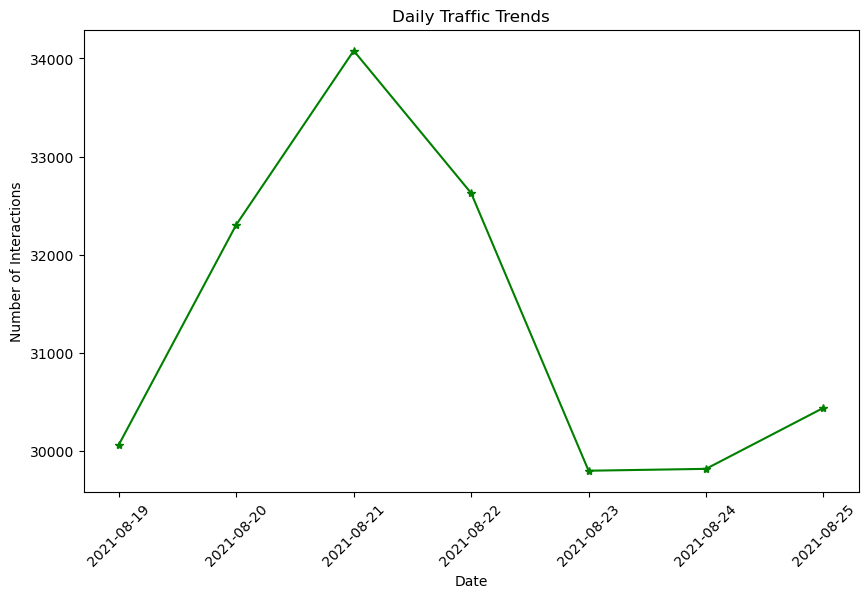

In [21]:
# Group by date and count events to get daily traffic trends
daily_traffic = website_traffic.groupby(website_traffic['date'].dt.date).size()

plt.figure(figsize=(10, 6))
plt.plot(daily_traffic.index, daily_traffic.values, marker='*', color='g', linestyle='-')
plt.title('Daily Traffic Trends')
plt.xlabel('Date')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.show()


###  Pie charts for traffic sources

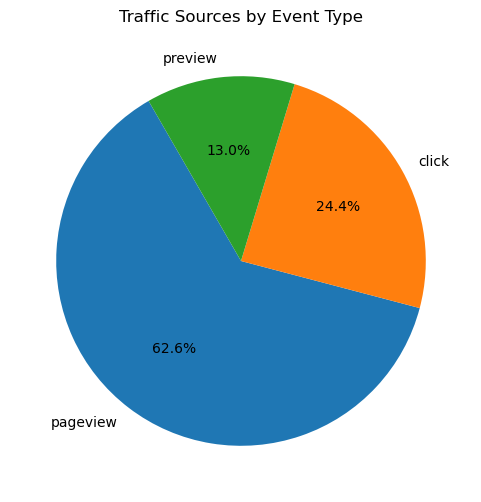

In [22]:
# Count occurrences of each event type
event_counts =  website_traffic['event'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(event_counts, labels=event_counts.index, autopct='%1.1f%%', startangle=120)
plt.title('Traffic Sources by Event Type')
plt.show()


### Bar charts for top-performing pages.

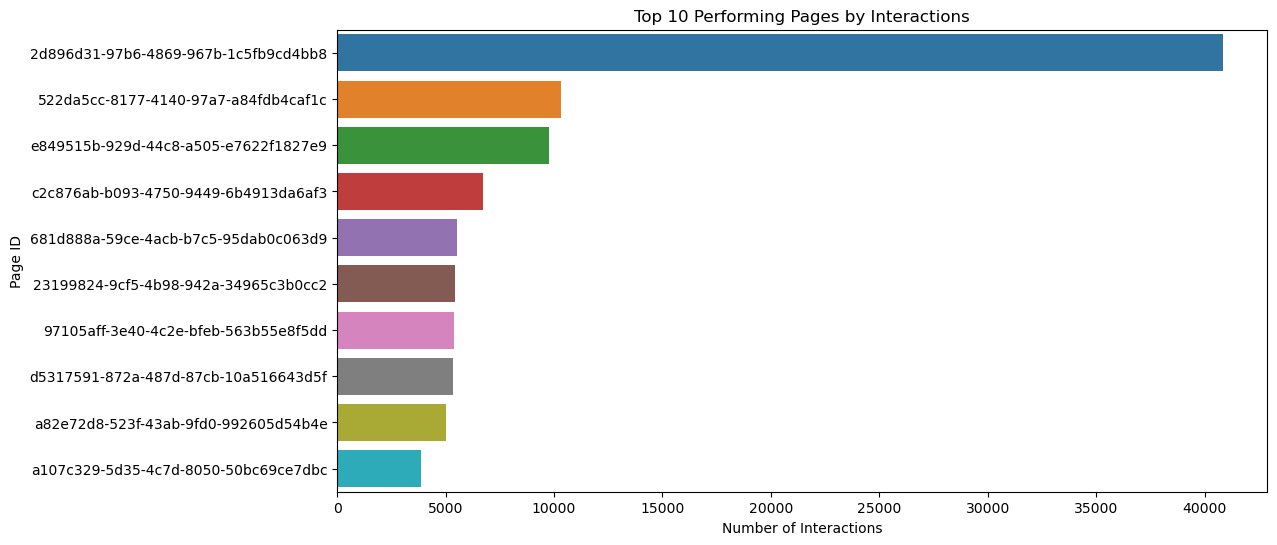

In [23]:
# Get the top 10 most interacted pages
top_pages =  website_traffic['linkid'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_pages.values, y=top_pages.index)
plt.title('Top 10 Performing Pages by Interactions')
plt.xlabel('Number of Interactions')
plt.ylabel('Page ID')
plt.show()


# Website Traffic Analysis Report

# **Introduction**
<br>
Website traffic analysis is the process of monitoring and evaluating the visitor activity on a website.This analysis provides insights into how users are interacting with the website,where they are coming from, most visited pages, and how long they stay. By analyzing this data, businesses can:

* Understand user behavior and preferences
* Improve site performance
* Enhance content strategies
* Optimize content to increase engagement and conversions. 
* Improve user experience and
* Optimize for Search Engine Optimization (SEO).
<br>
This report provides a comprehensive analysis of website traffic trends, offering invaluable insights for businesses seeking to optimize thier online presence.

# Dataset Review
The dataset for this analysis consists of 226279 records with 9 columns: event, date, country, city, artist, album, track, isrc, and linkid.
<br>
The data spans from 19th August 2021 to 25th August 2021, providing a comprehensive view of user behavior, traffic sources, and interactions.

# Objectives
This analysis aims to eavaluate the effectiveness of online marketing strategies and identify areas for improvement.

# Data Cleaning
The data cleaning process involved:
* **Missing Values:** Records with missing values were dropped, ensuring data completeness.
<br>
* **Duplicates Removal:** 103,711 duplicate records were identified and removed based on identical values in all columns.
<br>
* **Date Formatting:** Converted the date column to datetime format to facilitate chronological analysis.
These steps yielded a consistent dataset, primed for accurate analysis.


# Exploratory Data Analysis (EDA)

## Traffic Trends Analysis
Analysis of daily traffic trends revealed significant patterns:
### **Key Findings**
Traffic peaked on August 21, 2021, with 34,079 interactions. Other high-traffic days occurred between August 19 and August 25, indicating possible promotions during this period.
Traffic patterns showed consistent engagement, with significant spikes suggesting optimal times for content publication.

# User Behavior Analysis

### Key Findings:
* The analysis identified distinct trends in user behavior:
<br>
Pageview events constituted 59.36% of total interactions, indicating users are primarily browsing.
<br>
click events comprised 26.27%, and preview events accounted for 14.37%.
<br>
* Top 10 Artists by User Interactions: 
<br>
Artists such as Tesher (8,288 interactions) and Anne-Marie (4,028 interactions) were the most engaged, 
<br>
suggesting user interest in specific content areas.

# Conversion Rate Analysis
### Key Findings
The overall conversion rates for different events were:
<br>
Click Conversion Rate: 26.27%.
<br>
Pageview Conversion Rate: 59.36%.
<br>
Preview Conversion Rate: 14.37%.
<br>
These rates reflect strong user interest in page views and clicks, indicating well-structured pathways on the website.


## Most Popular Pages
Analysis of the linkid field identified the top 10 most interacted pages, providing insights into high-performing content.
<br>
The most popular page had 8,288 interactions, demonstrating user interest in specific topics or sections.
Traffic Sources
Country-level analysis highlighted traffic distribution:

### Traffic Sources: 
* Top Traffic Sources by Country:
<br>
The following countries accounted for the highest traffic volumes:
<br>
Saudi Arabia            46,960 (34.2% of total traffic)
<br>
India                   42,991 (31.4% of total traffic)
<br>
United States           27355 (20.0% of total traffic)
<br>
France                  15638 (11.4% of total traffic)
<br>
* Saudi Arabia and India dominate traffic sources, indicating strong engagement in these regions. The United States and France contribute significant traffic, while Iraq emerges as a notable secondary market.

# Summary
The website traffic analysis highlights valuable insights into user behavior, conversion rates, and traffic sources. key findings include:
* Traffic trends show consistent engagement with peaks in August 21.
* User primarily browse (59.36%) and click (26.27%).
* Top engaged pages indicate strong interest in specific content.
* Conversion rates are highest for page views and clicks.
* Saudi Arabia, India, the United States, and France dominate traffic sources.

# Conclusion
The website traffic analysis highlights valuable insights into user behavior, conversion rates, and traffic sources. The findings indicates a strong interest in specific content, consistent engagement, and opportunities for optimization. By leveraging these insights, the website can enhance user experience, improveconversion rates, and increase overall performance.

# Recommendations
* Optimize Content Timing:
Schedule major content releases on high-traffic days.
* Enhance Interactive Elements:
Add interactive features to high-performing pages to boost click conversions.
* Targeted Content Strategy: 
Focus on popular artists and topics to increase user engagement.
* Geographic Marketing:
Target the top traffic-generating countries with localized content and promotions.
* User Pathway Optimization: 
Streamline navigation for frequently accessed pages to improve user flow and conversion.
Implementing these strategies could enhance website engagement, user satisfaction, and conversion rates, contributing to overall business growth.

